# plot theta 

In [42]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper
import math

# Load Hists
no need to run analysis cell every time

In [43]:
# reload hists
file = TFile("hists.root")
# file = TFile("temp_hists.root")
theta_bl_truth = file.Get("theta_bl_truth")
theta_bl_reco = file.Get("theta_bl_reco")
theta_bl_minimax = file.Get("theta_bl_minimax")
theta_t = file.Get("theta_t")
theta_t_restframe = file.Get("theta_t_restframe")


theta_bl_2D = file.Get("theta_bl_2D")
theta_t_2D = file.Get("theta_t_2D")
theta_t_vs_bl = file.Get("theta_t_vs_bl")
theta_reco_truth = file.Get("theta_reco_truth")
theta_reco_truth_t = file.Get("theta_reco_truth_t")

In [44]:
theta_bl_truth.Integral()

413400.0

## plot

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


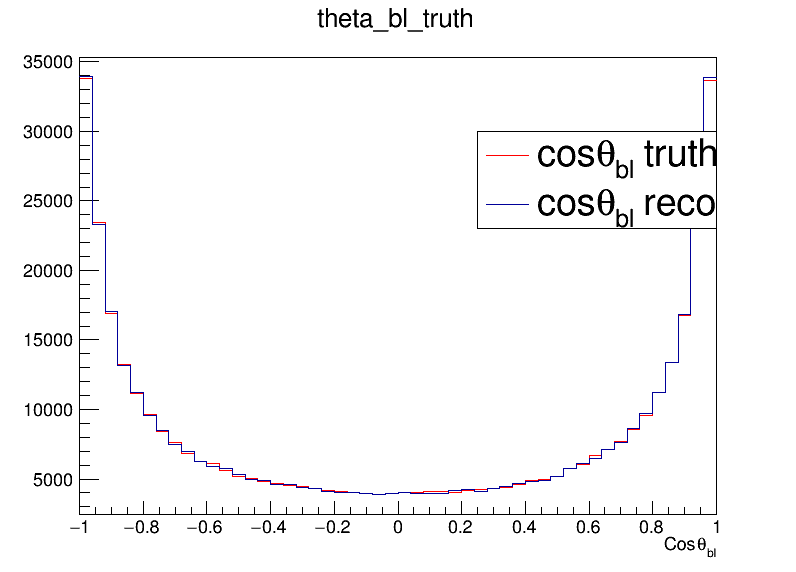

In [45]:
c1 = TCanvas('c1', 'canvas1', 0, 0, 800, 600 )

theta_bl_truth.SetLineColorAlpha(2, 1)
theta_bl_truth.Draw()
theta_bl_truth.GetXaxis().SetTitle("Cos#theta_{bl}")

theta_bl_reco.Draw('same')

leg = TLegend(0.6,0.6,0.9,0.77)
leg.AddEntry(theta_bl_truth,"cos#theta_{bl} truth", "l")
leg.AddEntry(theta_bl_reco,"cos#theta_{bl} reco", "l")

leg.Draw()

c1.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


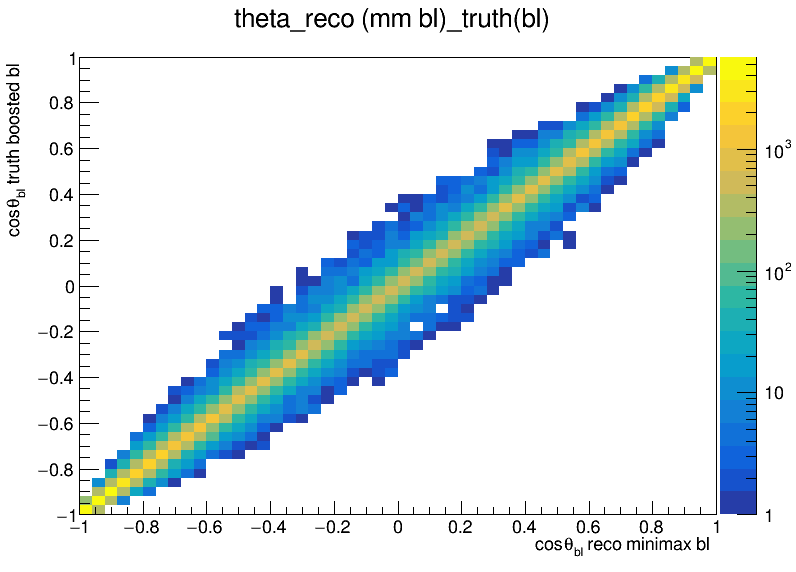

In [46]:
c2 = TCanvas('c2', 'canvas2', 0, 0, 800, 600 )

theta_reco_truth.Draw("COLZ")
theta_bl_2D.SetStats(0)
c2.SetLogz()
theta_reco_truth.GetXaxis().SetTitle("cos#theta_{bl} reco minimax bl")
theta_reco_truth.GetYaxis().SetTitle("cos#theta_{bl} truth boosted bl")

c2.Draw()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


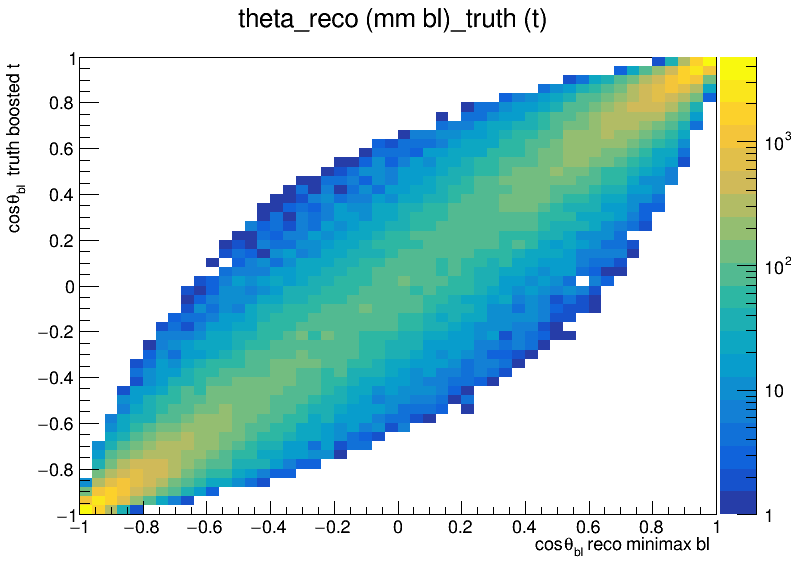

In [47]:
c3 = TCanvas('c3', 'canvas2', 0, 0, 800, 600 )

theta_reco_truth_t.Draw("COLZ")
theta_reco_truth_t.SetStats(0)
c3.SetLogz()
theta_reco_truth_t.GetXaxis().SetTitle("cos#theta_{bl} reco minimax bl")
theta_reco_truth_t.GetYaxis().SetTitle("cos#theta_{bl}  truth boosted t")

c3.Draw()


## ratio plot: truth level vs. reco level(truth matched)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


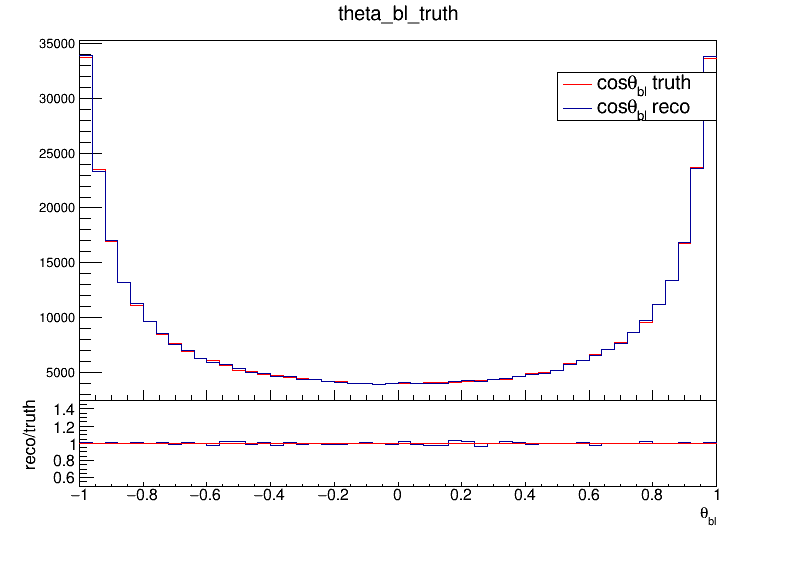

In [48]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.Draw()
pad1.cd()

theta_bl_truth.Draw()
theta_bl_truth.SetLineColorAlpha(2, 1)

theta_bl_reco.Draw('same')
leg = TLegend(0.7,0.7,0.9,0.82)
leg.AddEntry(theta_bl_truth,"cos#theta_{bl} truth","l")
leg.AddEntry(theta_bl_reco,"cos#theta_{bl} reco","l")
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
gStyle.SetOptStat(0)


ratio = theta_bl_reco.Clone("ratio")

ratio.SetStats(False)
ratio.SetTitle("")
ratio.GetXaxis().SetLabelOffset(0.005)
ratio.GetXaxis().SetLabelSize(0.12)
ratio.GetXaxis().SetTitleOffset(1.1)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetLabelSize(0.12)
ratio.GetYaxis().SetTitleSize(0.13)
ratio.GetYaxis().SetTitle("reco/truth")
ratio.GetYaxis().SetTitleOffset(0.3)
ratio.GetYaxis().SetRangeUser(0.9, 1.2)
ratio.GetYaxis().SetNdivisions(506)
ratio.Draw("pe")
ratio.GetYaxis().SetRangeUser(0.5,1.5)
ratio.GetXaxis().SetTitle("#theta_{bl}")
ratio.Divide(theta_bl_truth)
ratio.Draw("")

ref = theta_bl_truth.Clone("ref")
ref.Divide(theta_bl_truth)
ref.Draw("same")
c.Draw()

## ratio plot: truth t (rest frame) vs. minimax bl

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


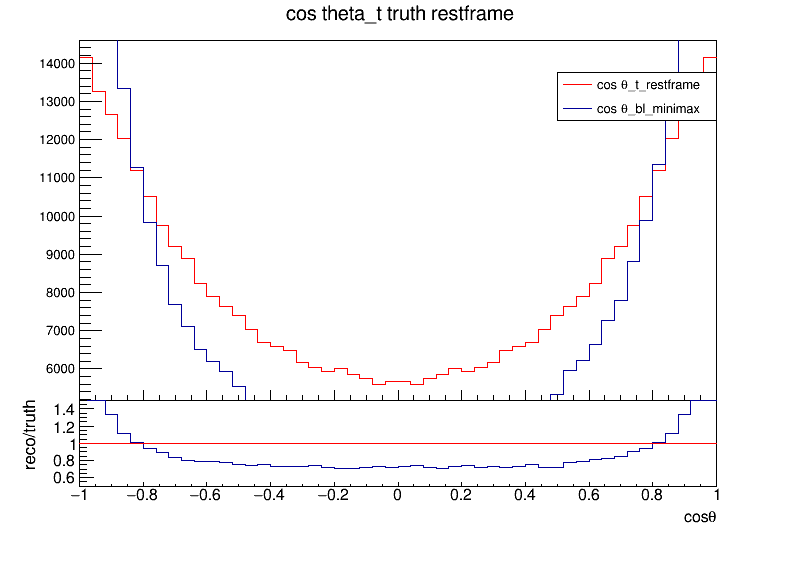

In [49]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.Draw()
pad1.cd()

theta_t_restframe.Draw()
theta_t_restframe.SetLineColorAlpha(2, 1)

theta_bl_minimax.Draw('same')
leg = TLegend(0.7,0.7,0.9,0.82)
leg.AddEntry(theta_t_restframe,"cos #theta_t_restframe","l")
leg.AddEntry(theta_bl_minimax, "cos #theta_bl_minimax","l")
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
gStyle.SetOptStat(0)


ratio = theta_bl_minimax.Clone("ratio")

ratio.SetStats(False)
ratio.SetTitle("")
ratio.GetXaxis().SetLabelOffset(0.005)
ratio.GetXaxis().SetLabelSize(0.12)
ratio.GetXaxis().SetTitleOffset(1.1)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetLabelSize(0.12)
ratio.GetYaxis().SetTitleSize(0.13)
ratio.GetYaxis().SetTitle("reco/truth")
ratio.GetYaxis().SetTitleOffset(0.3)
ratio.GetYaxis().SetRangeUser(0.9, 1.2)
ratio.GetYaxis().SetNdivisions(506)
ratio.Draw("pe")
ratio.GetYaxis().SetRangeUser(0.5,1.5)
ratio.GetXaxis().SetTitle("cos#theta")
ratio.Divide(theta_t_restframe)
ratio.Draw("")

ref = theta_t_restframe.Clone("ref")
ref.Divide(theta_t_restframe)
ref.Draw("same")
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4


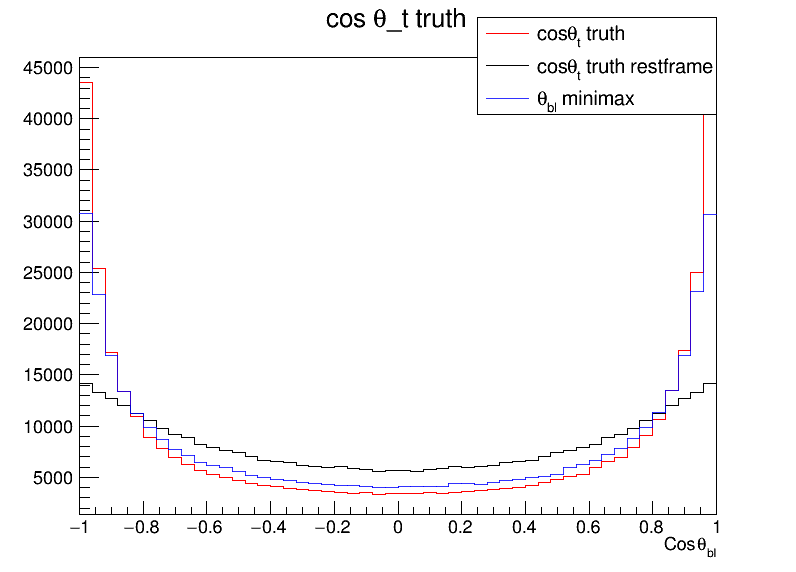

In [50]:
c4 = TCanvas('c4', 'canvas4', 0, 0, 800, 600 )
theta_t.SetStats(0)
theta_t.SetLineColorAlpha(2, 1)
theta_t.Draw()
theta_t.GetXaxis().SetTitle("Cos#theta_{bl}")

theta_t_restframe.SetLineColorAlpha(1, 1)
theta_t_restframe.Draw('same')

theta_bl_minimax.SetLineColorAlpha(4,0.8)
theta_bl_minimax.Draw('same')

leg = TLegend(0.6,0.8,0.9,0.97)
leg.AddEntry(theta_t,"cos#theta_{t} truth", "l")
leg.AddEntry(theta_t_restframe,"cos#theta_{t} truth restframe", "l")
leg.AddEntry(theta_bl_minimax, "#theta_{bl} minimax", "l")
leg.Draw()

c4.Draw()



Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


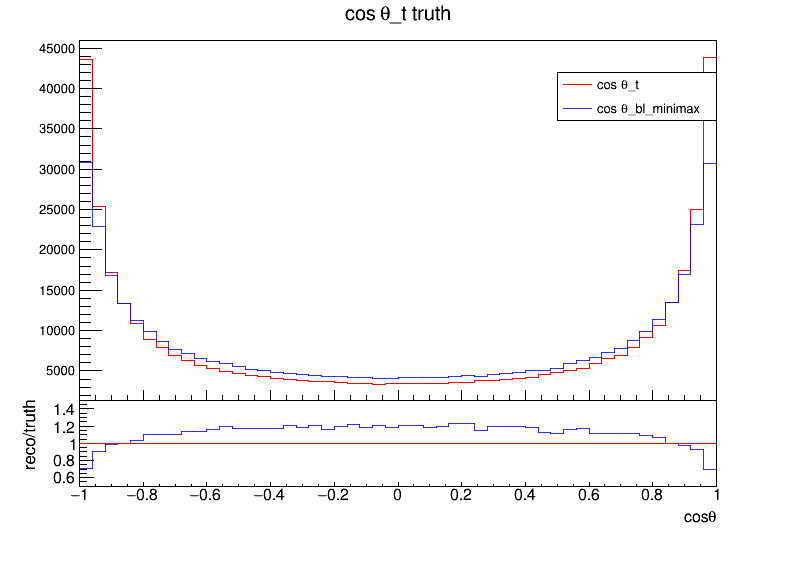

In [51]:
c = ROOT.TCanvas("c", "c", 800, 600)
# Divide the canvas into two pads: one for the upper plot, one for the lower plot
pad1 = ROOT.TPad("pad1", "pad1", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0)  # Remove the space between the plots
pad1.Draw()
pad1.cd()

theta_t.Draw()
theta_t.SetLineColorAlpha(2, 1)

theta_bl_minimax.Draw('same')
leg = TLegend(0.7,0.7,0.9,0.82)
leg.AddEntry(theta_t,"cos #theta_t","l")
leg.AddEntry(theta_bl_minimax, "cos #theta_bl_minimax","l")
leg.Draw()

# Lower plot
c.cd()
pad2 = ROOT.TPad("pad2", "pad2", 0, 0.05, 1, 0.3)
pad2.SetTopMargin(0)  # Remove the space between the plots
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
gStyle.SetOptStat(0)


ratio = theta_bl_minimax.Clone("ratio")

ratio.SetStats(False)
ratio.SetTitle("")
ratio.GetXaxis().SetLabelOffset(0.005)
ratio.GetXaxis().SetLabelSize(0.12)
ratio.GetXaxis().SetTitleOffset(1.1)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetLabelSize(0.12)
ratio.GetYaxis().SetTitleSize(0.13)
ratio.GetYaxis().SetTitle("reco/truth")
ratio.GetYaxis().SetTitleOffset(0.3)
ratio.GetYaxis().SetRangeUser(0.9, 1.2)
ratio.GetYaxis().SetNdivisions(506)
ratio.Draw("pe")
ratio.GetYaxis().SetRangeUser(0.5,1.5)
ratio.GetXaxis().SetTitle("cos#theta")
ratio.Divide(theta_t)
ratio.Draw("")

ref = theta_t.Clone("ref")
ref.Divide(theta_t)
ref.Draw("same")
c.Draw()

In [52]:
file.Close()
